# EMH 효율적 시장 가설

In [31]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import re as re
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import plotly.express as px

In [22]:
# assign the values accordingly 
consumer_key = "X" 
consumer_secret = "X" 
access_token = "X" 
access_token_secret = "X" 

  
# authorization of consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
# set access to user's access key and access secret  
auth.set_access_token(access_token, access_token_secret) 
  
# calling the api  
api = tweepy.API(auth) 

# 데이터 수집
- 기간: 2017/01/20-2020/09/30
- 리트윗 포함
- 방법: Tweepy모듈 사용

In [23]:
# 자격 권한 설장
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# API 이용해서 도널드 트럼프 트윗 수집
dtweets = tweepy.Cursor(api.user_timeline, id="realDonaldTrump", include_rts=True, count=200, tweet_mode="extended")

# 데이터프레임 생성 
df = pd.DataFrame(columns=["Date Created", "RT Count", "Tweet"])

# 데이터프레임에 데이터 추가
i = 0
for tweet in dtweets.items(3000):
    df.loc[i, "Date Created"] = tweet.created_at
    df.loc[i, "RT Count"] = tweet.retweet_count
    df.loc[i, "Tweet"] = tweet.full_text
    
    i += 1
    if i == 3000:
        break
    else:
        pass

In [24]:
df

,Date Created,RT Count,Tweet
0,2020-10-05 12:08:17,18654,TODAY is the LAST day to register to VOTE in A...
1,2020-10-05 11:14:48,26966,PEACE THROUGH STRENGTH (BRING OUR SOLDIERS HOM...
2,2020-10-05 11:12:53,31082,SAVE OUR SECOND AMENDMENT. VOTE!
3,2020-10-05 11:10:26,41193,FIGHT THE CORRUPT FAKE NEWS MEDIA. VOTE!
4,2020-10-05 11:08:34,27117,PROTECT PREEXISTING CONDITIONS. VOTE!
...,...,...,...
2995,2020-07-14 23:05:30,8416,RT @TeamTrump: President @realDonaldTrump on J...
2996,2020-07-14 23:05:24,12393,RT @TeamTrump: President @realDonaldTrump: “Ma...
2997,2020-07-14 22:40:52,8506,RT @WhiteHouse: LIVE: President @realDonaldTru...
2998,2020-07-14 15:42:19,20553,RT @realDonaldTrump: Admiral Ronny Jackson (@R...


# 데이터 클리닝

In [25]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

df["Clean Tweet"] = df['Tweet'].apply(lambda x: clean_tweet(x))

i = 0
for tweet in dtweets.items(3000):
    clean_tweet(tweet.full_text)
    
    i += 1
    if i == 3000:
        break
    else:
        pass
    
df.tail()

,Date Created,RT Count,Tweet,Clean Tweet
2995,2020-07-14 23:05:30,8416,RT @TeamTrump: President @realDonaldTrump on J...,RT President on Joe Biden s deep love for Chin...
2996,2020-07-14 23:05:24,12393,RT @TeamTrump: President @realDonaldTrump: “Ma...,RT President Make no mistake we hold China ful...
2997,2020-07-14 22:40:52,8506,RT @WhiteHouse: LIVE: President @realDonaldTru...,RT LIVE President holds a press conference
2998,2020-07-14 15:42:19,20553,RT @realDonaldTrump: Admiral Ronny Jackson (@R...,RT Admiral Ronny Jackson is a very successful ...
2999,2020-07-14 15:40:18,12674,RT @realDonaldTrump: Tony Gonzales (@TonyGonza...,RT Tony Gonzales will be a GREAT Congressman f...


# 감성분석

In [26]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

In [27]:
df["Sentiment"] = df["Clean Tweet"].apply(lambda x: analyze_sentiment(x))

i = 0
for tweet in dtweets.items(3000):
    analyze_sentiment(tweet.full_text)
    
    i += 1
    if i == 3000:
        break
    else:
        pass
df.tail()

,Date Created,RT Count,Tweet,Clean Tweet,Sentiment
2995,2020-07-14 23:05:30,8416,RT @TeamTrump: President @realDonaldTrump on J...,RT President on Joe Biden s deep love for Chin...,Positive
2996,2020-07-14 23:05:24,12393,RT @TeamTrump: President @realDonaldTrump: “Ma...,RT President Make no mistake we hold China ful...,Positive
2997,2020-07-14 22:40:52,8506,RT @WhiteHouse: LIVE: President @realDonaldTru...,RT LIVE President holds a press conference,Positive
2998,2020-07-14 15:42:19,20553,RT @realDonaldTrump: Admiral Ronny Jackson (@R...,RT Admiral Ronny Jackson is a very successful ...,Positive
2999,2020-07-14 15:40:18,12674,RT @realDonaldTrump: Tony Gonzales (@TonyGonza...,RT Tony Gonzales will be a GREAT Congressman f...,Positive


# 데이터 시각화

## 감성 분포

Text(0, 0.5, 'Count')

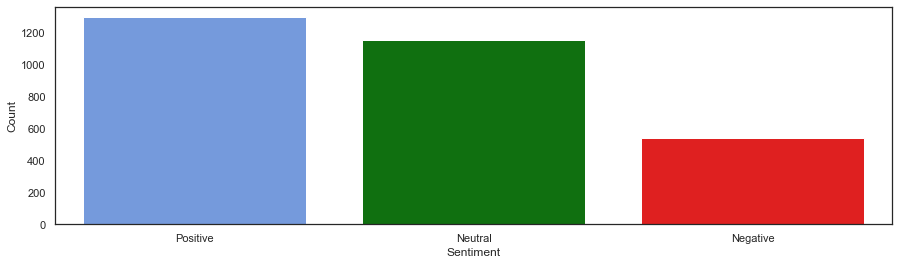

In [30]:
sns.set(style="white")
plt.figure(figsize=(15,4))
colors = ["#6495ed", "green", "red"]
ax = sns.countplot(x="Sentiment", data=df, palette=colors)
plt.ylabel("Count")

In [38]:
fig = px.bar(df, x="Sentiment", hover_data=["Sentiment"], 
             color='Sentiment', labels={'Count':'Count'}, height=400)
fig.show()

## 트윗 빈도

In [46]:
fig = px.line(df, x="Date Created", y="Tweet")
fig.show()